In [ ]:
!pip install textblob==0.17.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.19.0
    Uninstalling textblob-0.19.0:
      Successfully uninstalled textblob-0.19.0


In [ ]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')


from textblob import TextBlob
import csv
import requests
from io import StringIO

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Loading

In [ ]:
df = pd.read_csv('review_pokemon.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,01797499-ac12-42e9-8be3-76e477527e26,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,poor apps,1,0,1.2.0,2025-04-11 05:55:16,NaN,NaN,1.2.0
1,3359d04a-dfda-47a7-a3f0-73c1399c48aa,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,i just dont like it,1,0,1.2.0,2025-04-11 05:50:08,NaN,NaN,1.2.0
2,df385c03-b3f5-4668-96fe-7eb6a39fcb1d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"After playing this game for a month, I've noti...",2,0,1.2.0,2025-04-11 05:40:22,NaN,NaN,1.2.0
3,e37dbd4b-0aa1-4944-8370-6f9edca8ce75,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Fix your RNG POCKET!!!,1,0,1.2.0,2025-04-11 05:37:13,NaN,NaN,1.2.0
4,07757d0f-876d-4326-9172-9f4eb4428a63,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,solitaire is a better card game than this shi.,1,0,1.2.0,2025-04-11 04:53:38,NaN,NaN,1.2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51559 entries, 0 to 51558
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              51559 non-null  object 
 1   userName              51559 non-null  object 
 2   userImage             51559 non-null  object 
 3   content               51559 non-null  object 
 4   score                 51559 non-null  int64  
 5   thumbsUpCount         51559 non-null  int64  
 6   reviewCreatedVersion  46726 non-null  object 
 7   at                    51559 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            46726 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [ ]:
df.drop_duplicates()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,01797499-ac12-42e9-8be3-76e477527e26,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,poor apps,1,0,1.2.0,2025-04-11 05:55:16,NaN,NaN,1.2.0
1,3359d04a-dfda-47a7-a3f0-73c1399c48aa,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,i just dont like it,1,0,1.2.0,2025-04-11 05:50:08,NaN,NaN,1.2.0
2,df385c03-b3f5-4668-96fe-7eb6a39fcb1d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"After playing this game for a month, I've noti...",2,0,1.2.0,2025-04-11 05:40:22,NaN,NaN,1.2.0
3,e37dbd4b-0aa1-4944-8370-6f9edca8ce75,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Fix your RNG POCKET!!!,1,0,1.2.0,2025-04-11 05:37:13,NaN,NaN,1.2.0
4,07757d0f-876d-4326-9172-9f4eb4428a63,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,solitaire is a better card game than this shi.,1,0,1.2.0,2025-04-11 04:53:38,NaN,NaN,1.2.0
...,...,...,...,...,...,...,...,...,...,...,...
51554,27e467da-8329-4559-a647-2fdf6a9cfdc2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Cool, but it's already bugged out. Didn't get ...",2,4,1.0.2,2024-09-26 01:56:36,NaN,NaN,1.0.2
51555,71a615cf-d043-42b4-b303-4ff0748b830a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Seems pretty slick from the first few hours. S...,4,3,1.0.2,2024-09-26 01:26:44,NaN,NaN,1.0.2
51556,0fe40fc4-317c-4034-a3c9-7f6b9f3c5e5c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Early daya,3,0,1.0.2,2024-09-26 01:12:18,NaN,NaN,1.0.2
51557,edcd5f9a-17e0-4d73-8bae-be7f0de6eb6b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Doesn't work,1,14,1.0.2,2024-09-26 00:39:12,NaN,NaN,1.0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51559 entries, 0 to 51558
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              51559 non-null  object 
 1   userName              51559 non-null  object 
 2   userImage             51559 non-null  object 
 3   content               51559 non-null  object 
 4   score                 51559 non-null  int64  
 5   thumbsUpCount         51559 non-null  int64  
 6   reviewCreatedVersion  46726 non-null  object 
 7   at                    51559 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            46726 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


# Preprocessing Text

In [ ]:
stemmer = PorterStemmer()

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('\n', ' ')
    text = text.strip()
    return text

def casefoldingText(text):
    return text.lower()

def tokenizingText(text):
    return word_tokenize(text)

def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    filtered_text = [word for word in text if word not in listStopwords]
    return filtered_text

def stemmingText(text):
    return [stemmer.stem(word) for word in text]

def toSentence(list_words):
    return ' '.join(list_words)

In [ ]:
slang_words = {
    "afaik": "as far as I know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atm": "at the moment",
    "b4": "before",
    "bae": "before anyone else",
    "bc": "because",
    "bf": "boyfriend",
    "bff": "best friends forever",
    "brb": "be right back",
    "btw": "by the way",
    "cray": "crazy",
    "da": "the",
    "dat": "that",
    "dis": "this",
    "dunno": "don't know",
    "dw": "don't worry",
    "fab": "fabulous",
    "fam": "family",
    "fml": "fuck my life",
    "fr": "for real",
    "gf": "girlfriend",
    "gg": "good game",
    "gonna": "going to",
    "gr8": "great",
    "h8": "hate",
    "idc": "I don't care",
    "idk": "I don't know",
    "ily": "I love you",
    "imo": "in my opinion",
    "irl": "in real life",
    "jk": "just kidding",
    "k": "okay",
    "l8r": "later",
    "lmao": "laughing my ass off",
    "lol": "laughing out loud",
    "luv": "love",
    "lysm": "love you so much",
    "n": "and",
    "nah": "no",
    "nbd": "no big deal",
    "nm": "not much",
    "np": "no problem",
    "nvm": "never mind",
    "ofc": "of course",
    "omg": "oh my god",
    "pls": "please",
    "ppl": "people",
    "r": "are",
    "rofl": "rolling on the floor laughing",
    "rn": "right now",
    "smh": "shaking my head",
    "sry": "sorry",
    "stfu": "shut the fuck up",
    "sup": "what's up",
    "tbh": "to be honest",
    "tgif": "thank god it's friday",
    "thx": "thanks",
    "til": "today I learned",
    "ttyl": "talk to you later",
    "u": "you",
    "ur": "your",
    "wanna": "want to",
    "w/": "with",
    "w/o": "without",
    "wtf": "what the fuck",
    "ya": "yes",
    "ye": "yes",
    "yolo": "you only live once",
}

def remove_slang(text):
    words = text.split()
    new_words = [slang_words.get(word, word) for word in words]
    return " ".join(new_words)

In [ ]:
def preprocess_text(text):
    text = cleaningText(text)
    text = remove_slang(text)
    text = casefoldingText(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = stemmingText(text)
    text = toSentence(text)
    return text

df['cleaned_content'] = df['content'].apply(preprocess_text)

In [ ]:
df.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,cleaned_content
1112,0144aed9-e5a9-4aad-8d3a-4ed6ec03441d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,unless you use the new decks the game will for...,1,0,1.2.0,2025-04-01 15:40:48,NaN,NaN,1.2.0,unless use new deck game forc brick everi time...
1992,8c415850-2387-4628-8317-7aea42a10bfb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Feels like recent expansion nerfed the amount ...,3,1,1.1.2,2025-03-27 08:41:50,NaN,NaN,1.1.2,feel like recent expans nerf amount ex full ar...
27440,75a38b27-3ab7-408a-9f8a-eafcf7983584,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love pokemon,5,0,1.0.7,2024-11-24 14:41:20,NaN,NaN,1.0.7,love pokemon
28207,1bc87656-f1ba-4919-a534-e9b5c213c518,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,NaN,2024-11-22 16:41:10,NaN,NaN,NaN,good
41058,ea808d60-6f05-4e36-95ad-8a3a957f062c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,i hate my friend who introduced me to this game,5,0,1.0.6,2024-11-03 15:27:27,NaN,NaN,1.0.6,hate friend introduc game


# Pelabelan

In [ ]:
from textblob import TextBlob

In [ ]:
import csv
import requests
from io import StringIO

def labeling_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'positif'
    elif polarity < 0:
        return 'negatif'
    else:
        return 'netral'


df['label_textblob'] = df['cleaned_content'].apply(labeling_sentiment_textblob)

In [ ]:
df.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,cleaned_content,label_textblob
30755,9b6360ed-87b2-4ec8-9ee0-8ea45822480a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Okay so first of all I really like the game an...,3,6,1.0.7,2024-11-17 03:08:09,NaN,NaN,1.0.7,okay first realli like game experi collect car...,positif
46867,8e709b17-a5dd-4a92-9846-8ac7a26df49b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love this game,5,0,1.0.5,2024-10-30 17:17:00,NaN,NaN,1.0.5,love game,positif
21340,cfbad6f3-c16e-42b8-8618-736b8363d79e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The shuffle system seems like unfair between c...,1,1,1.0.9,2024-12-15 07:40:38,NaN,NaN,1.0.9,shuffl system seem like unfair competitor even...,negatif
11607,6be48c2b-a73a-473a-8e7a-78c42ea8a7fb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I dont know why everytime I play everyone's Po...,2,0,1.0.9,2025-01-29 23:42:53,NaN,NaN,1.0.9,dont know everytim play everyon pokémon stage ...,negatif
1082,c3b6b369-5141-4d91-a3da-5eabda7f2473,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"What is there not to love, here? (Also, Arceus...",5,0,1.2.0,2025-04-01 20:22:31,NaN,NaN,1.2.0,love also arceu belov ♥️,positif


In [ ]:
label_counts = df['label_textblob'].value_counts()

print("Jumlah Label:")
print(f"- Positif: {label_counts.get('positif', 0)}")
print(f"- Negatif: {label_counts.get('negatif', 0)}")
print(f"- Netral: {label_counts.get('netral', 0)}")

Jumlah Label:
- Positif: 26511
- Negatif: 14003
- Netral: 11045


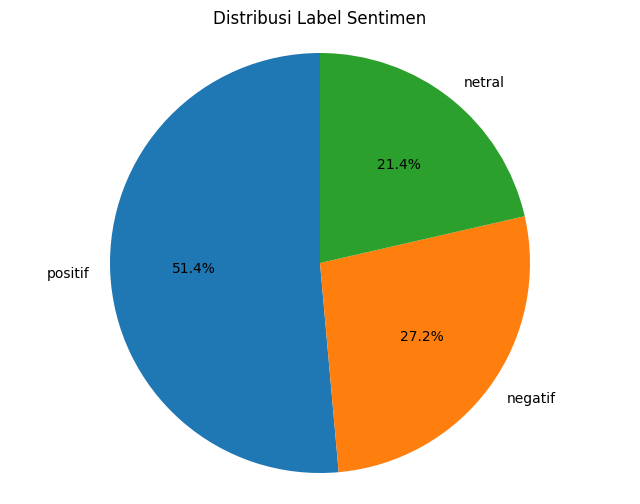

In [ ]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels = label_counts.index.tolist()
sizes = label_counts.values.tolist()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Label Sentimen')
plt.axis('equal')
plt.show()

# Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode label
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label_textblob'])
y = df['label_encoded']
X = df['cleaned_content']

# Modelling

# Skema 1:TF-IDF dan SVM (80/20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)


In [37]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
y_pred = model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm,)

print(classification_report(y_test, y_pred))

Accuracy: 0.9568140677527799
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4201
           1       0.95      0.96      0.96      3314
           2       0.97      0.96      0.97      7953

    accuracy                           0.96     15468
   macro avg       0.95      0.95      0.95     15468
weighted avg       0.96      0.96      0.96     15468



# Skema 2: Random Forest dan TF-IDF (70/30)

In [40]:
# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit dan transform data training
X = vectorizer.fit_transform(df['cleaned_content'])
y = df['label_encoded']

In [41]:
# Bagi data menjadi data training dan testing (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [42]:
model_rf = RandomForestClassifier(n_estimators=150, random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred))

Accuracy: 0.9008275148694078
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      4201
           1       0.94      0.92      0.93      3314
           2       0.88      0.96      0.92      7953

    accuracy                           0.90     15468
   macro avg       0.91      0.89      0.90     15468
weighted avg       0.90      0.90      0.90     15468



# Skema 3: Deep Learning dan LSTM (80/20)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd

# 1. Preprocessing untuk model LSTM
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_raw)

X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Konversi label ke one-hot encoding
y_train_cat = pd.get_dummies(y_train).values
y_test_cat = pd.get_dummies(y_test).values

# 2. Model LSTM
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    LSTM(128, return_sequences=True, kernel_regularizer='l2'),
    Dropout(0.5),
    LSTM(64, kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 untuk jumlah kelas (positif, negatif, netral)
])

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

# 4. Training Model
history = model_lstm.fit(
    X_train_pad, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_data=(X_test_pad, y_test_cat),
    callbacks=callbacks
)

# 5. Evaluasi Model
loss, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test_cat)
print("\nEvaluasi Model LSTM:")
print(f"Accuracy: {accuracy_lstm}")

Epoch 1/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 302s 457ms/step - accuracy: 0.6565 - loss: 1.4211 - val_accuracy: 0.9402 - val_loss: 0.2671 - learning_rate: 0.0010
Epoch 2/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 338s 482ms/step - accuracy: 0.9462 - loss: 0.2533 - val_accuracy: 0.8792 - val_loss: 0.4128 - learning_rate: 0.0010
Epoch 3/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 322s 481ms/step - accuracy: 0.9545 - loss: 0.2193 - val_accuracy: 0.9611 - val_loss: 0.1708 - learning_rate: 0.0010
Epoch 4/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 301s 448ms/step - accuracy: 0.9734 - loss: 0.1417 - val_accuracy: 0.9596 - val_loss: 0.1687 - learning_rate: 0.0010
Epoch 5/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 282s 436ms/step - accuracy: 0.9756 - loss: 0.1289 - val_accuracy: 0.9585 - val_loss: 0.1695 - learning_rate: 0.0010
Epoch 6/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 286s 443ms/step - accuracy: 0.9794 - loss: 0.1120 - val_accuracy: 0.9588 - val_loss: 0.1638 - learning_rate: 0.0010
Epoch 7/15
645/645 ━━━━━━━━━━━━━━━━━━━━ 319s 439ms/step - accura

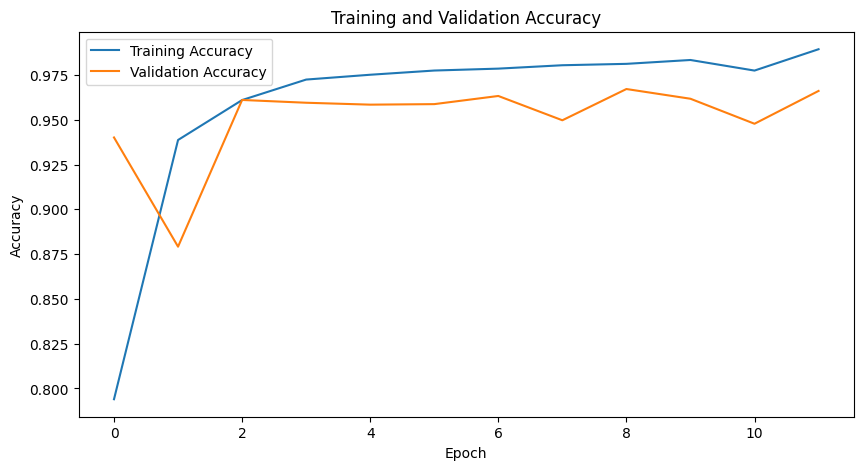

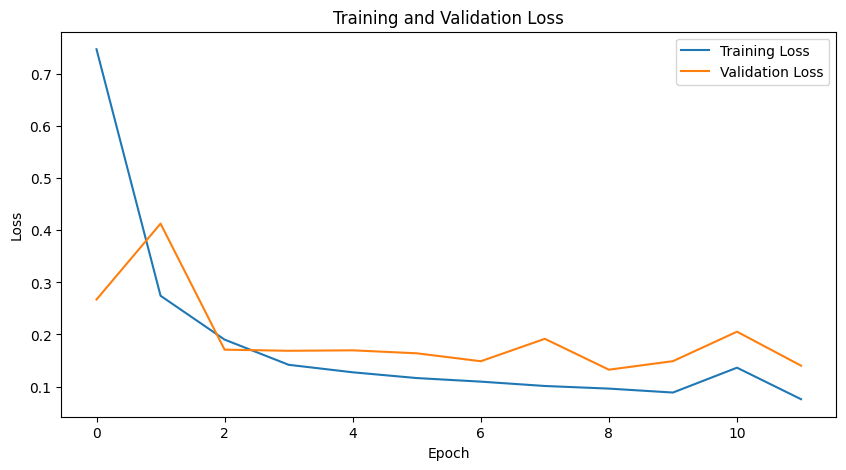

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Perbandingan Ketiga Skema

In [43]:
# Data akurasi dari setiap skema (diambil dari variabel)
akurasi_skema = {
    "Skema 1 (TF-IDF dan SVM)": accuracy_svm,
    "Skema 2 (TF-IDF dan Random Forest)": accuracy_rf,
    "Skema 3 (Deep Learning dan LSTM)": accuracy_lstm
}

# Menentukan skema terbaik
skema_terbaik = max(akurasi_skema, key=akurasi_skema.get)

# Menampilkan hasil perbandingan
print("Perbandingan Skema dan Akurasi:")
for skema, akurasi in akurasi_skema.items():
    print(f"- {skema}: {akurasi}")

print(f"\nSkema Terbaik: {skema_terbaik} (Akurasi: {akurasi_skema[skema_terbaik]})")

Perbandingan Skema dan Akurasi:
- Skema 1 (TF-IDF dan SVM): 0.9568140677527799
- Skema 2 (TF-IDF dan Random Forest): 0.9008275148694078
- Skema 3 (Deep Learning dan LSTM): 0.9672226309776306

Skema Terbaik: Skema 3 (Deep Learning dan LSTM) (Akurasi: 0.9672226309776306)
